In [1]:
import mplfinance as mpf
import requests
import pandas as pd
import re
import time


import plotly.graph_objects as go
import plotly.subplots as ms
import talib
import matplotlib.pyplot as plt     # 점찍기용


import matplotlib.pyplot as plt    # 히트맵용
import seaborn as sns              # 히트맵용
import numpy as np
from pandas import Series, DataFrame

In [2]:
test1 = pd.read_csv('004360.KS.csv', encoding='cp949')
test1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,12650.0,12800.0,12650.0,12800.0,11878.130859,17179
1,2018-01-03,12800.0,12800.0,12650.0,12750.0,11831.732422,6561
2,2018-01-04,12750.0,12750.0,12450.0,12500.0,11599.737305,12973
3,2018-01-05,12650.0,12650.0,12400.0,12550.0,11646.135742,16385
4,2018-01-08,12550.0,12650.0,12450.0,12650.0,11738.934570,7874
...,...,...,...,...,...,...,...
1307,2023-04-24,42100.0,42700.0,30150.0,30150.0,30150.000000,298261
1308,2023-04-25,21150.0,21150.0,21150.0,21150.0,21150.000000,198985
1309,2023-04-26,14850.0,17750.0,14850.0,15710.0,15710.000000,22070324
1310,2023-04-27,15710.0,16900.0,15540.0,16260.0,16260.000000,5517487


In [3]:
# date, close, volume만 남기기

test1 = test1[['Date', 'Close', 'Volume']]
test1

,Date,Close,Volume
0,2018-01-02,12800.0,17179
1,2018-01-03,12750.0,6561
2,2018-01-04,12500.0,12973
3,2018-01-05,12550.0,16385
4,2018-01-08,12650.0,7874
...,...,...,...
1307,2023-04-24,30150.0,298261
1308,2023-04-25,21150.0,198985
1309,2023-04-26,15710.0,22070324
1310,2023-04-27,16260.0,5517487


In [4]:
test2 = pd.read_csv('게시글_004360.csv', encoding='cp949')
test2

,날짜,게시글
0,2017-09-15,1
1,2017-11-01,1
2,2017-11-18,1
3,2017-11-20,1
4,2017-11-21,1
...,...,...
882,2023-04-27,974
883,2023-04-28,777
884,2023-04-29,133
885,2023-04-30,82


In [5]:
test1.index = pd.DatetimeIndex(test1['Date'])
test1

,Date,Close,Volume
Date,,,
2018-01-02,2018-01-02,12800.0,17179
2018-01-03,2018-01-03,12750.0,6561
2018-01-04,2018-01-04,12500.0,12973
2018-01-05,2018-01-05,12550.0,16385
2018-01-08,2018-01-08,12650.0,7874
...,...,...,...
2023-04-24,2023-04-24,30150.0,298261
2023-04-25,2023-04-25,21150.0,198985
2023-04-26,2023-04-26,15710.0,22070324


In [6]:
test2.index = pd.DatetimeIndex(test2['날짜'])
test2

,날짜,게시글
날짜,,
2017-09-15,2017-09-15,1
2017-11-01,2017-11-01,1
2017-11-18,2017-11-18,1
2017-11-20,2017-11-20,1
2017-11-21,2017-11-21,1
...,...,...
2023-04-27,2023-04-27,974
2023-04-28,2023-04-28,777
2023-04-29,2023-04-29,133


In [7]:
# https://ddaaadd.tistory.com/154

m = test1.join(test2)

m

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,12800.0,17179,NaN,NaN
2018-01-03,2018-01-03,12750.0,6561,NaN,NaN
2018-01-04,2018-01-04,12500.0,12973,2018-01-04,1.0
2018-01-05,2018-01-05,12550.0,16385,NaN,NaN
2018-01-08,2018-01-08,12650.0,7874,NaN,NaN
...,...,...,...,...,...
2023-04-24,2023-04-24,30150.0,298261,2023-04-24,178.0
2023-04-25,2023-04-25,21150.0,198985,2023-04-25,574.0
2023-04-26,2023-04-26,15710.0,22070324,2023-04-26,1745.0


In [8]:
m.head(20)

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,12800.0,17179,NaN,NaN
2018-01-03,2018-01-03,12750.0,6561,NaN,NaN
2018-01-04,2018-01-04,12500.0,12973,2018-01-04,1.0
2018-01-05,2018-01-05,12550.0,16385,NaN,NaN
2018-01-08,2018-01-08,12650.0,7874,NaN,NaN
2018-01-09,2018-01-09,12550.0,15460,NaN,NaN
2018-01-10,2018-01-10,12650.0,13865,2018-01-10,1.0
2018-01-11,2018-01-11,12750.0,13323,2018-01-11,1.0
2018-01-12,2018-01-12,12850.0,17327,NaN,NaN


In [9]:
m = m.rename(columns={'날짜': 'naver_date', '게시글': 'Post'})

In [10]:
heatmap_data = m[["Close", "Volume", "Post"]]

<Axes: title={'center': '004360.KS'}>

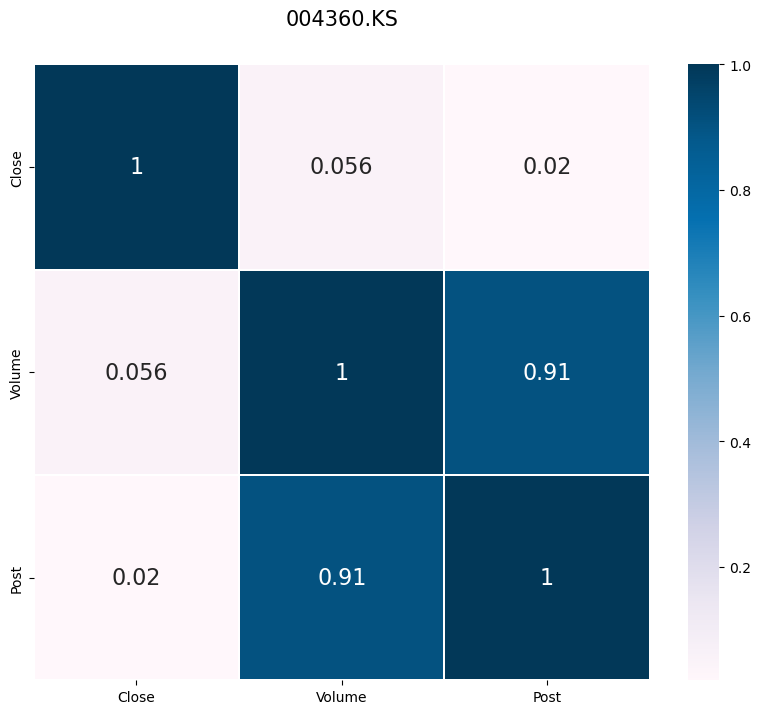

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("004360.KS", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})